# Decision tree, KNN, and RandomForest demo

In [1]:
import numpy as np
import numpy.random as npr

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

%precision %.2f

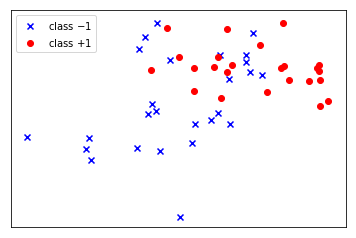

In [2]:
# make up some fake data

N = 50
X = npr.randn(N,2)
y = npr.choice((-1,+1),size=N)
X[y>0,0] += 1
X[y>0,1] += 1

plt.scatter(X[y<0,0], X[y<0,1], color="b", marker="x", label="class $-1$")
plt.scatter(X[y>0,0], X[y>0,1], color="r", marker="o",  label="class $+1$")
plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') # remove ticks
plt.legend(loc="best")

In [3]:
# code adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plotClassifier(model, X, y, transformation=None, filename=None):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max,200)
    x2_line =  np.linspace(x2_min, x2_max,200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)

    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    
    if transformation is not None:
        mesh_data = transformation(mesh_data)
    y_pred = model.predict(mesh_data)
    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred, cmap=plt.cm.RdBu, alpha=0.6)

    plt.scatter(x1[y<0], x2[y<0], color="b", marker="x", label="class $-1$")
    plt.scatter(x1[y>0], x2[y>0], color="r", marker="o", label="class $+1$")
    plt.legend(loc="best")
    plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') # remove ticks
    if filename is not None:
        plt.savefig(filename)

## Decision trees

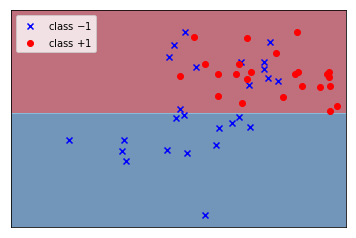

In [4]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X,y)
plotClassifier(dt, X, y)

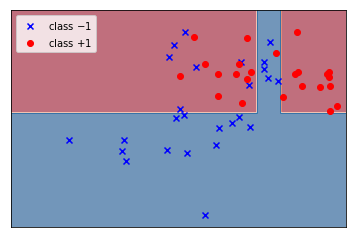

In [5]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)
plotClassifier(dt, X, y)

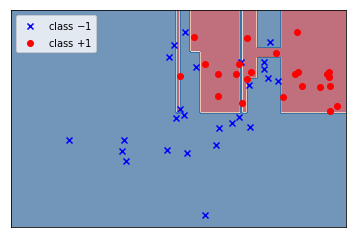

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X,y)
plotClassifier(dt, X, y)


## KNN

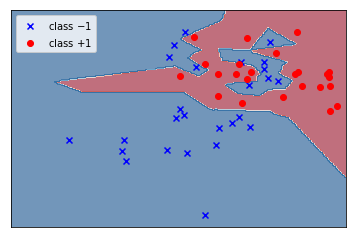

In [7]:
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X,y)
plotClassifier(nn, X, y)

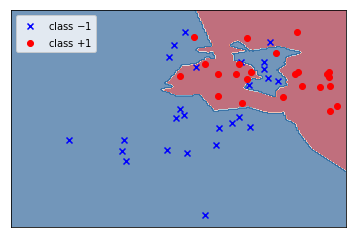

In [8]:
nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(X,y)
plotClassifier(nn, X, y)

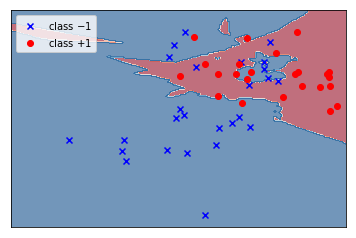

In [9]:
nn = KNeighborsClassifier(n_neighbors=10)
nn.fit(X,y)
plotClassifier(nn, X, y)

## Random Forests

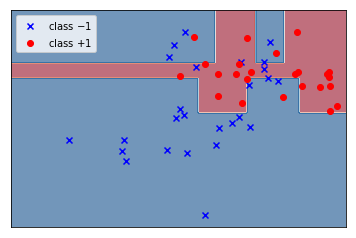

In [10]:
rf = RandomForestClassifier(n_estimators=1)
rf.fit(X,y)
plotClassifier(rf, X, y)

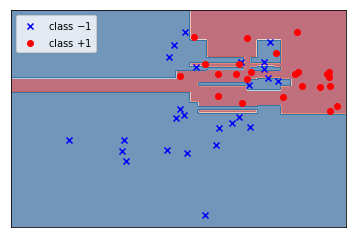

In [11]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X,y)
plotClassifier(rf, X, y)

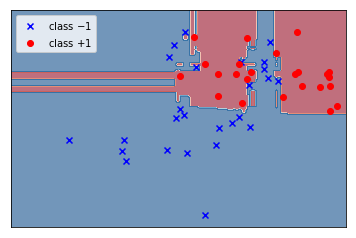

In [12]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X,y)
plotClassifier(rf, X, y)

### Averaging KNN, Decision Tree, Random Forest

- The next cell will be slow the first time you run it, as it needs to download the data set (internet connection needed).


In [13]:
import sklearn.datasets

# load the newsgroups data
train = sklearn.datasets.fetch_20newsgroups_vectorized(subset='train')
X_train = train.data
y_train = train.target

test = sklearn.datasets.fetch_20newsgroups_vectorized(subset='test')
X_test = test.data
y_test = test.target

In [14]:
print("n =", X_train.shape[0])
print("d =", X_train.shape[1])
print("t =", X_test.shape[0])
num_classes = len(np.unique(y_train))
print("number of classes =", num_classes)

n = 11314
d = 130107
t = 7532
number of classes = 20


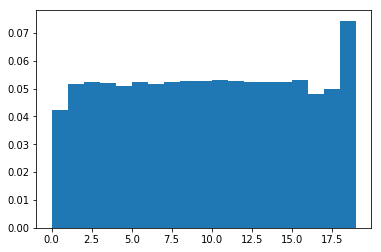

In [29]:
# check the uniformity of the training labels
plt.hist(y_train, normed=True, bins=np.unique(y_train));

Ok, they aren't perfectly uniform but the situation isn't too bad either.

In [15]:
def print_errs(model):
    train_err = 1-model.score(X_train, y_train)
    test_err  = 1-model.score(X_test,  y_test)

    print("Train error:", train_err)
    print("Test  error:", test_err)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print_errs(dt)

Train error: 8.83860703553e-05
Test  error: 0.441715347849


In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print_errs(rf)

Train error: 0.0025631960403
Test  error: 0.437865108869


In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print_errs(knn)

Train error: 0.208679512109
Test  error: 0.59160913436


In [19]:
from sklearn.ensemble import VotingClassifier

classifiers = {
    "decision tree" : dt,
    "random forest" : rf,
    "KNN"           : knn
}

ensemble = VotingClassifier(classifiers.items())
ensemble.fit(X_train, y_train)

print_errs(ensemble)

Train error: 0.000883860703553
Test  error: 0.417419012215


Overall the results here aren't that amazing. And yet it's cool that the ensemble is better than all 3 individual classifiers.

## (bonus) XGBoost

- This requires some extra installation: `conda install py-xgboost` worked for me.
- This code takes several minutes to run (for me at least).

In [20]:
import xgboost as xgb
import scipy.sparse

dtrain = xgb.DMatrix(scipy.sparse.csc_matrix(X_train), label=y_train)
dtest =  xgb.DMatrix(scipy.sparse.csc_matrix(X_test),  label=y_test)

//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The above deprecation warning will hopefully be dealt with in newer versions of xgboost (if it hasn't already).

In [21]:
param = {'max_depth':10, 'eta':1, 'silent':1, 'objective':'multi:softmax', 'num_class':num_classes}
num_round = 10 # number of trees

bst = xgb.train(param, dtrain, num_round)

In [22]:
yhat_train = bst.predict(dtrain)
yhat_test  = bst.predict(dtest)

print("Train error:", np.mean(yhat_train != y_train))
print("Test error:",  np.mean(yhat_test != y_test))

Train error: 0.000353544281421
Test error: 0.328332448221


This does much better than the other methods above. It uses boosting with decision trees -- a specific form of boosting called gradient boosting. XGBoost tends to do very well on a lot of tasks.